In [1]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/household_power_consumption.txt', sep = ';', low_memory = False)

## 1.

In [ ]:
dataset.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## 3.

In [ ]:
dataset.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


## 4.

In [ ]:
dataset['Datetime'] = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'], format='%d/%m/%Y %H:%M:%S')
dataset['Day_of_week'] = dataset['Datetime'].dt.dayofweek
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00,5
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00,5
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00,5
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00,5
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00,5


In [ ]:
dataset['Month'] = dataset['Datetime'].dt.month
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00,5,12
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00,5,12
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00,5,12
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00,5,12
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00,5,12


## 5.

In [ ]:
dataset_2007 = dataset[dataset['Datetime'].dt.year == 2007].copy()

dataset_2007['Global_active_power'] = pd.to_numeric(dataset_2007['Global_active_power'], errors='coerce')
daily_avg_power_2007 = dataset_2007.set_index('Datetime')['Global_active_power'].resample('D').mean()

print("Média de consumo diário de Global_active_power em 2007:")
display(daily_avg_power_2007.head())

Média de consumo diário de Global_active_power em 2007:


,Global_active_power
Datetime,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


## 6.

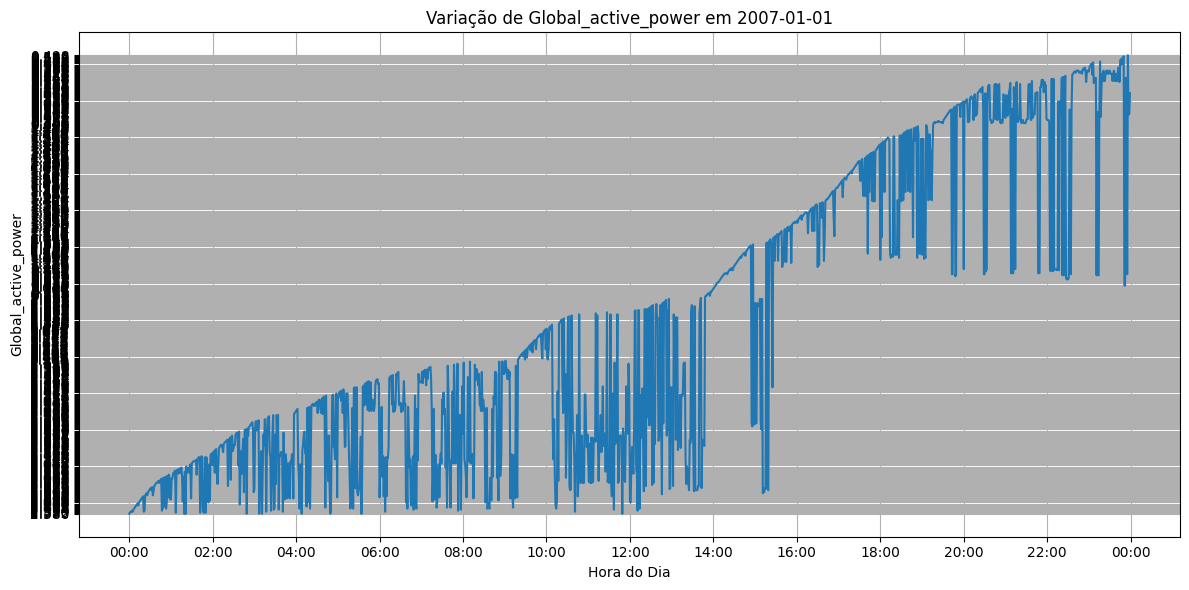

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


date_to_plot = '2007-01-01'


dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])
daily_power_data = dataset[dataset['Datetime'].dt.date == pd.to_datetime(date_to_plot).date()]


if daily_power_data.empty:
    print(f"No data available for {date_to_plot}")
else:
    plt.figure(figsize=(12, 6))
    plt.plot(daily_power_data['Datetime'], daily_power_data['Global_active_power'])
    plt.title(f'Variação de Global_active_power em {date_to_plot}')
    plt.xlabel('Hora do Dia')
    plt.ylabel('Global_active_power')


    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 7.

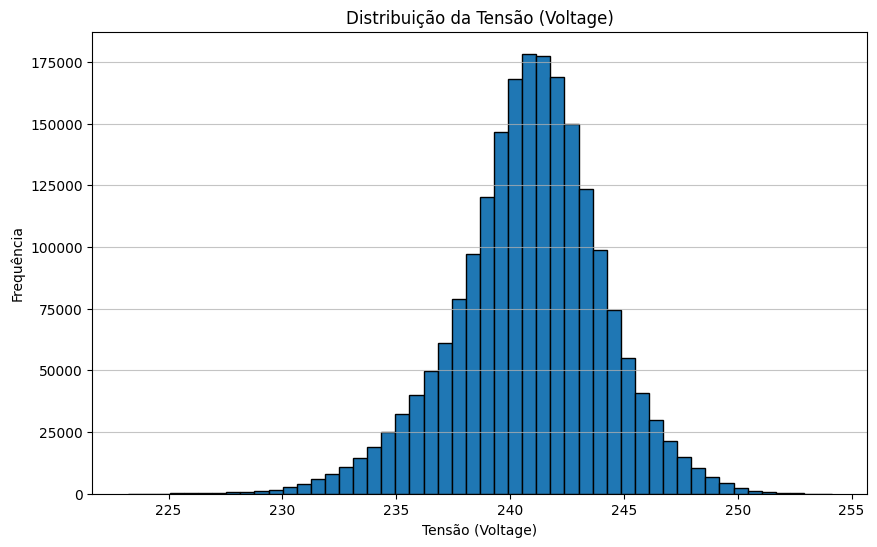

In [ ]:
import matplotlib.pyplot as plt

dataset['Voltage'] = pd.to_numeric(dataset['Voltage'], errors='coerce')

dataset_cleaned_voltage = dataset.dropna(subset=['Voltage']).copy()

plt.figure(figsize=(10, 6))
plt.hist(dataset_cleaned_voltage['Voltage'], bins=50, edgecolor='black')
plt.title('Distribuição da Tensão (Voltage)')
plt.xlabel('Tensão (Voltage)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

Analisando o gráfico é possivel ver que a tensão se concentra entre 240-245 voltagens. O gráfico se concentra no meio e as extremidades ficam com os valores mais baixos ou mais altos

## 8.

In [ ]:
dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')
monthly_avg_global_power = dataset.groupby('Month')['Global_active_power'].mean()

print("Consumo médio de Global_active_power por mês:")
display(monthly_avg_global_power)

Consumo médio de Global_active_power por mês:


,Global_active_power
Month,
1,1.462226
2,1.300431
3,1.231343
4,1.047146
5,1.029571
6,0.909148
7,0.700359
8,0.572812
9,0.975653


## 9.

In [ ]:
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'])
dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')


dataset_indexed = dataset.set_index('Datetime')

daily_avg_power = dataset_indexed['Global_active_power'].resample('D').mean()


day_with_max_consumption = daily_avg_power.idxmax()
max_consumption_value = daily_avg_power.max()

print(f"O dia com o maior consumo médio de Global_active_power é: {day_with_max_consumption.date()}")
print(f"O consumo médio nesse dia foi: {max_consumption_value:.4f}")

O dia com o maior consumo médio de Global_active_power é: 2006-12-23
O consumo médio nesse dia foi: 3.3149


## 10.

In [ ]:
def categorize_day(day_of_week):
    if day_of_week < 5:
        return 'Weekday'
    else:
        return 'Weekend'

dataset['Day_type'] = dataset['Day_of_week'].apply(categorize_day)

dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')


average_consumption_by_day_type = dataset.groupby('Day_type')['Global_active_power'].mean()

print("Consumo médio de Global_active_power em dias de semana vs fim de semana:")
display(average_consumption_by_day_type)

Consumo médio de Global_active_power em dias de semana vs fim de semana:


,Global_active_power
Day_type,
Weekday,1.035472
Weekend,1.234232


## 11.

In [ ]:
correlation_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
correlation_df = dataset[correlation_cols].copy()


for col in correlation_cols:
    correlation_df[col] = pd.to_numeric(correlation_df[col], errors='coerce')


correlation_df.dropna(inplace=True)


correlation_matrix = correlation_df.corr()

print("Matriz de Correlação:")
display(correlation_matrix)

Matriz de Correlação:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


## 12.

In [ ]:

dataset['Sub_metering_1'] = pd.to_numeric(dataset['Sub_metering_1'], errors='coerce')
dataset['Sub_metering_2'] = pd.to_numeric(dataset['Sub_metering_2'], errors='coerce')
dataset['Sub_metering_3'] = pd.to_numeric(dataset['Sub_metering_3'], errors='coerce')

total_sub_metering = dataset['Sub_metering_1'] + dataset['Sub_metering_2'] + dataset['Sub_metering_3']

print("Total sub-metering values stored in a variable:")
display(total_sub_metering.head())

Total sub-metering values stored in a variable:


,0
0,18.0
1,17.0
2,19.0
3,18.0
4,18.0


## 13.

In [ ]:


if 'Month' not in dataset.columns:
    dataset['Month'] = dataset['Datetime'].dt.month

dataset['Sub_metering_1'] = pd.to_numeric(dataset['Sub_metering_1'], errors='coerce')
dataset['Sub_metering_2'] = pd.to_numeric(dataset['Sub_metering_2'], errors='coerce')
dataset['Sub_metering_3'] = pd.to_numeric(dataset['Sub_metering_3'], errors='coerce')
dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')



dataset['_temp_total_sub_metering'] = dataset['Sub_metering_1'] + dataset['Sub_metering_2'] + dataset['Sub_metering_3']



monthly_avg_total_sub_metering = dataset.groupby('Month')['_temp_total_sub_metering'].mean()


dataset.drop(columns=['_temp_total_sub_metering'], inplace=True)

print("Comparando Consumo Médio Mensal (Total Sub-metering vs Global Active Power):")


for month in monthly_avg_total_sub_metering.index:
    avg_sub = monthly_avg_total_sub_metering.loc[month]

    if month in monthly_avg_global_power.index:
        avg_global = monthly_avg_global_power.loc[month]

        if avg_sub > avg_global:
            print(f"Mês {month}: Total Sub-metering ({avg_sub:.2f}) ultrapassa Global Active Power ({avg_global:.2f}).")
        else:
             print(f"Mês {month}: Total Sub-metering ({avg_sub:.2f}) NÃO ultrapassa Global Active Power ({avg_global:.2f}).")
    else:
        print(f"Mês {month}: Média Global Active Power não disponível.")

Comparando Consumo Médio Mensal (Total Sub-metering vs Global Active Power):
Mês 1: Total Sub-metering (10.75) ultrapassa Global Active Power (1.46).
Mês 2: Total Sub-metering (10.11) ultrapassa Global Active Power (1.30).
Mês 3: Total Sub-metering (9.86) ultrapassa Global Active Power (1.23).
Mês 4: Total Sub-metering (8.93) ultrapassa Global Active Power (1.05).
Mês 5: Total Sub-metering (9.24) ultrapassa Global Active Power (1.03).
Mês 6: Total Sub-metering (8.75) ultrapassa Global Active Power (0.91).
Mês 7: Total Sub-metering (5.98) ultrapassa Global Active Power (0.70).
Mês 8: Total Sub-metering (5.17) ultrapassa Global Active Power (0.57).
Mês 9: Total Sub-metering (8.70) ultrapassa Global Active Power (0.98).
Mês 10: Total Sub-metering (9.13) ultrapassa Global Active Power (1.14).
Mês 11: Total Sub-metering (9.61) ultrapassa Global Active Power (1.29).
Mês 12: Total Sub-metering (10.56) ultrapassa Global Active Power (1.49).


## 14.

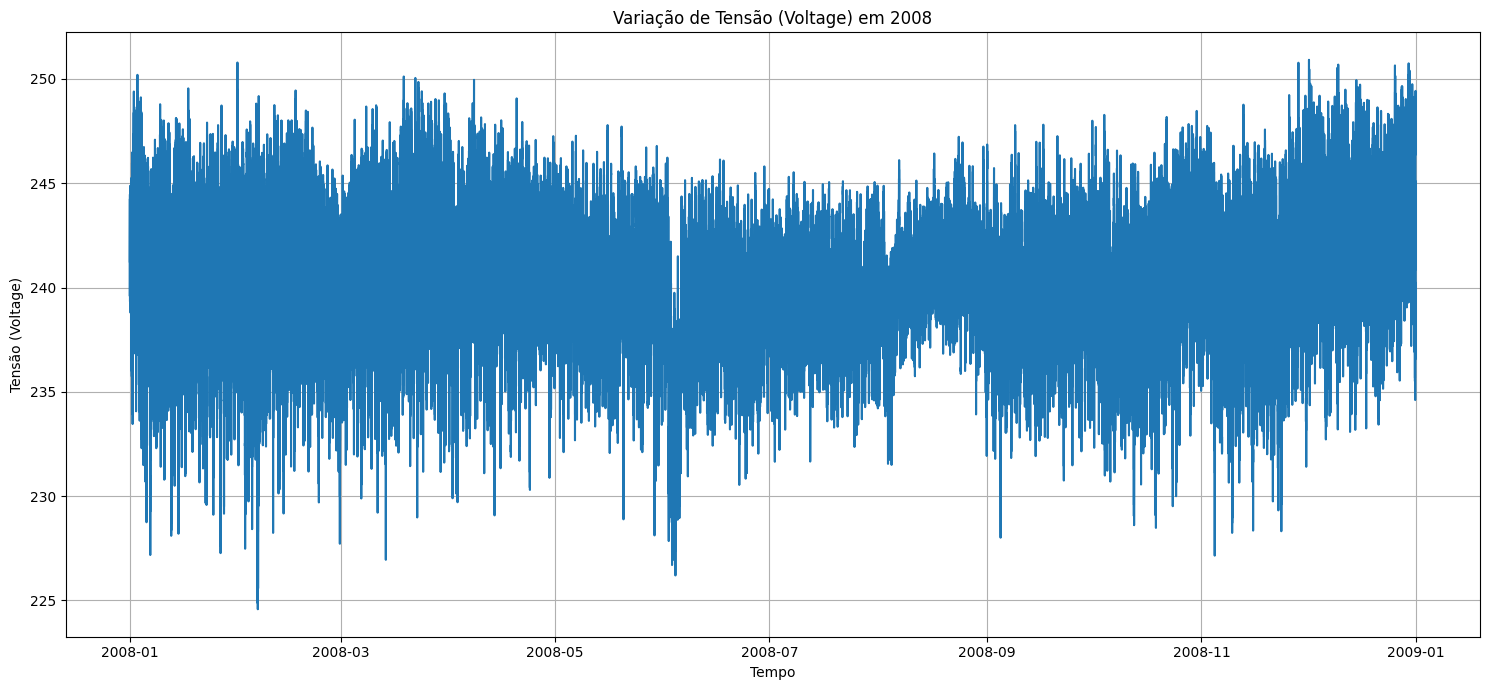

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataset for the year 2008
dataset_2008 = dataset[dataset['Datetime'].dt.year == 2008].copy()

# Ensure 'Voltage' column is numeric, coercing errors
dataset_2008['Voltage'] = pd.to_numeric(dataset_2008['Voltage'], errors='coerce')

# Drop rows with NaN 'Voltage' for plotting
dataset_2008_cleaned = dataset_2008.dropna(subset=['Voltage'])


# Create the time series plot for Voltage in 2008
plt.figure(figsize=(15, 7))
plt.plot(dataset_2008_cleaned['Datetime'], dataset_2008_cleaned['Voltage'])
plt.title('Variação de Tensão (Voltage) em 2008')
plt.xlabel('Tempo')
plt.ylabel('Tensão (Voltage)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 15.

In [ ]:

summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

if 'Month' not in dataset.columns:
    dataset['Month'] = dataset['Datetime'].dt.month


dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')


summer_data = dataset[dataset['Month'].isin(summer_months)].copy()
winter_data = dataset[dataset['Month'].isin(winter_months)].copy()

average_summer_consumption = summer_data['Global_active_power'].mean()
average_winter_consumption = winter_data['Global_active_power'].mean()

print("Comparação de Consumo Médio de Global_active_power (Hemisfério Norte):")
print(f"Média no Verão (Junho, Julho, Agosto): {average_summer_consumption:.4f}")
print(f"Média no Inverno (Dezembro, Janeiro, Fevereiro): {average_winter_consumption:.4f}")
if average_summer_consumption > average_winter_consumption:
    print("O consumo médio é maior no Verão.")
elif average_winter_consumption > average_summer_consumption:
    print("O consumo médio é maior no Inverno.")
else:
    print("O consumo médio é aproximadamente o mesmo no Verão e Inverno.")

Comparação de Consumo Médio de Global_active_power (Hemisfério Norte):
Média no Verão (Junho, Julho, Agosto): 0.7267
Média no Inverno (Dezembro, Janeiro, Fevereiro): 1.4176
O consumo médio é maior no Inverno.


## 16.

In [ ]:

dataset_sampled = dataset.sample(frac=0.01, random_state=42).copy()

print("Amostragem de 1% dos dados:")
display(dataset_sampled.head())

Amostragem de 1% dos dados:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Day_type
1870606,7/7/2010,18:10:00,0.256,0.106,242.00,1.200,0.0,0.0,1.0,2010-07-07 18:10:00,2,7,Weekday
213926,14/5/2007,06:50:00,0.466,0.352,237.22,2.400,0.0,2.0,0.0,2007-05-14 06:50:00,0,5,Weekday
409006,26/9/2007,18:10:00,0.758,0.194,238.66,3.200,0.0,1.0,0.0,2007-09-26 18:10:00,2,9,Weekday
265806,19/6/2007,07:30:00,1.290,0.046,240.64,5.400,1.0,0.0,18.0,2007-06-19 07:30:00,1,6,Weekday
1786279,10/5/2010,04:43:00,0.428,0.202,242.23,1.800,0.0,2.0,1.0,2010-05-10 04:43:00,0,5,Weekday


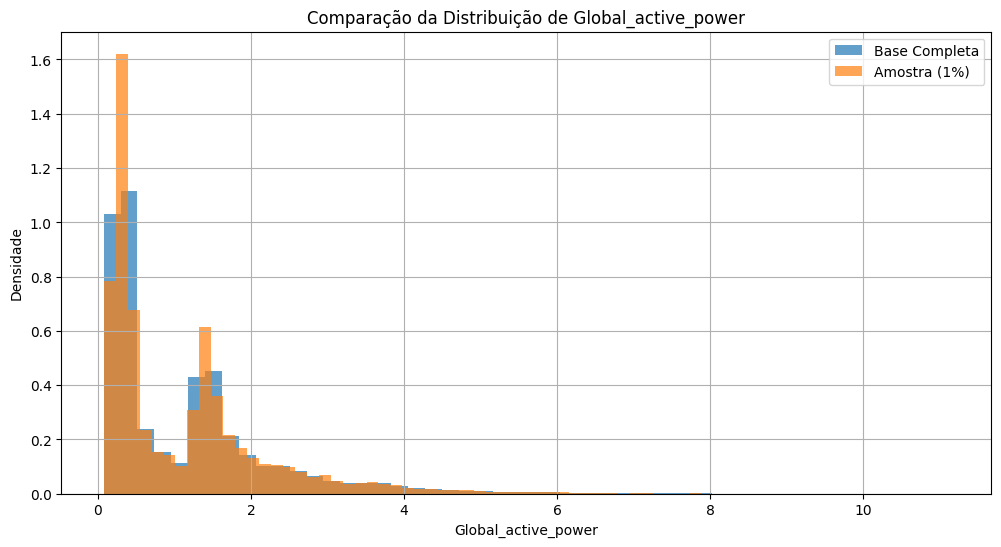

In [ ]:

dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')
dataset_sampled['Global_active_power'] = pd.to_numeric(dataset_sampled['Global_active_power'], errors='coerce')


dataset_cleaned_full = dataset.dropna(subset=['Global_active_power'])
dataset_cleaned_sampled = dataset_sampled.dropna(subset=['Global_active_power'])


plt.figure(figsize=(12, 6))

plt.hist(dataset_cleaned_full['Global_active_power'], bins=50, alpha=0.7, label='Base Completa', density=True)
plt.hist(dataset_cleaned_sampled['Global_active_power'], bins=50, alpha=0.7, label='Amostra (1%)', density=True)


plt.title('Comparação da Distribuição de Global_active_power')
plt.xlabel('Global_active_power')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

## 17.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


for col in numerical_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

dataset_cleaned_for_scaling = dataset.dropna(subset=numerical_cols).copy()

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(dataset_cleaned_for_scaling[numerical_cols])

scaled_df = pd.DataFrame(scaled_data, columns=[col + '_scaled' for col in numerical_cols], index=dataset_cleaned_for_scaling.index)

dataset_scaled = pd.concat([dataset_cleaned_for_scaling, scaled_df], axis=1)

print("Dataset with Min-Max Scaled variables:")
display(dataset_scaled.head())

Dataset with Min-Max Scaled variables:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Day_type,Global_active_power_scaled,Global_reactive_power_scaled,Voltage_scaled,Global_intensity_scaled,Sub_metering_1_scaled,Sub_metering_2_scaled,Sub_metering_3_scaled
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,5,12,Weekend,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,5,12,Weekend,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,5,12,Weekend,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,5,12,Weekend,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,5,12,Weekend,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387


## 18.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

dataset['Global_active_power'] = pd.to_numeric(dataset['Global_active_power'], errors='coerce')

dataset_cleaned = dataset.dropna(subset=['Global_active_power']).copy()


X = dataset_cleaned[['Global_active_power']].values
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
dataset_cleaned['Cluster'] = kmeans.fit_predict(X)

print("Dataset with K-Means Clusters:")
display(dataset_cleaned.head())

Dataset with K-Means Clusters:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Day_of_week,Month,Day_type,Cluster
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,5,12,Weekend,2
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,5,12,Weekend,2
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,5,12,Weekend,2
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,5,12,Weekend,2
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,5,12,Weekend,2


Os clusters foram dividos em níveis de consumo do mais baixo para o mais alto com base no global_active_power.

O cluster número 1 é oque mais aprece e ele representa a média de consumo, oque demonstra que há um desbalanceamento na distribuição desses clusters e é possivel ver que maior parte dessas amnostras são registradas em horário de pico, oque faz sentido levando em consideração os fatores

## 19.

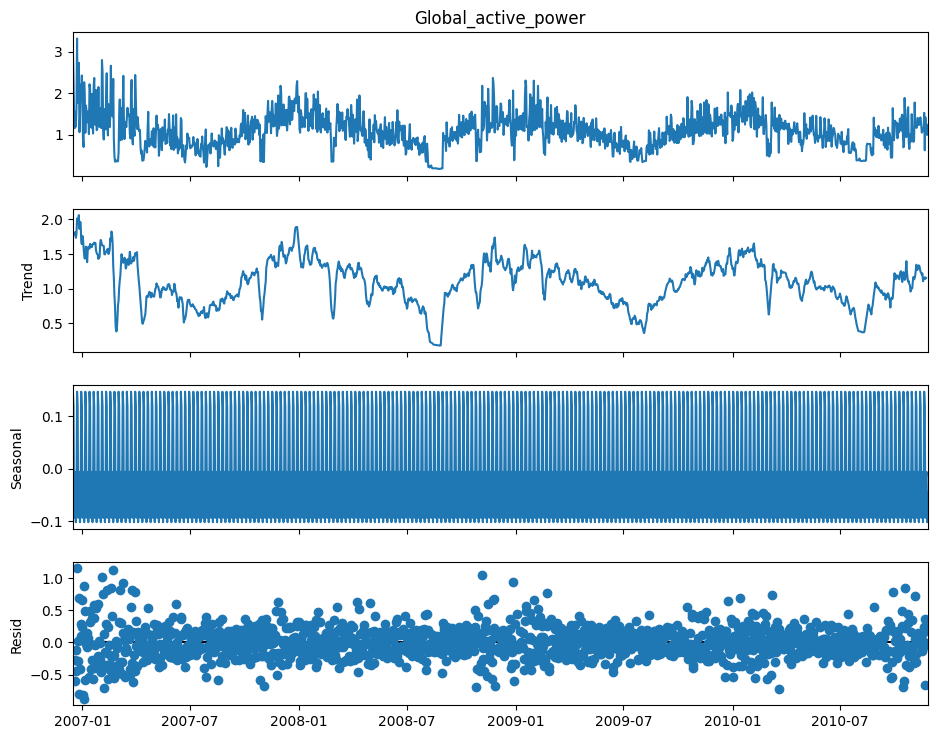

In [ ]:
import statsmodels.api as sm


if 'Datetime' in dataset_cleaned.columns:
    dataset_cleaned = dataset_cleaned.set_index('Datetime')
else:

    dataset_cleaned = dataset.dropna(subset=['Global_active_power']).copy()
    dataset_cleaned = dataset_cleaned.set_index('Datetime')


daily_data = dataset_cleaned['Global_active_power'].resample('D').mean().ffill()



decomposition = sm.tsa.seasonal_decompose(daily_data, model='additive', period=7)


fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

## 20.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset_cleaned['Global_intensity'] = pd.to_numeric(dataset_cleaned['Global_intensity'], errors='coerce')
dataset_cleaned['Global_active_power'] = pd.to_numeric(dataset_cleaned['Global_active_power'], errors='coerce')


dataset_cleaned_regression = dataset_cleaned.dropna(subset=['Global_intensity', 'Global_active_power']).copy()



X = dataset_cleaned_regression[['Global_intensity']]
y = dataset_cleaned_regression['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient (Global_intensity): {model.coef_[0]:.4f}")

Mean Squared Error: 0.0025
R-squared: 0.9978
Intercept: -0.0081
Coefficient (Global_intensity): 0.2376


O erro do meu modelo é basicamente a diferença entre o valor que ele previu e o valor real, isso a gente chama de resíduo. Eu usei o Erro Quadrático Médio (EQM) pra medir esse erro, que faz a média desses resíduos ao quadrado. Como o EQM deu praticamente zero, significa que as previsões do modelo ficaram bem próximas dos valores reais.

## 21.


In [ ]:
dataset_com_indice = dataset.set_index('Datetime')
dataset_com_indice['Global_active_power'] = pd.to_numeric(dataset_com_indice['Global_active_power'], errors='coerce')
hourly_avg_power = dataset_com_indice['Global_active_power'].resample('h').mean()
avg_power_by_hour = hourly_avg_power.groupby(hourly_avg_power.index.hour).mean()

horario_pico = avg_power_by_hour.idxmax()
valor_pico = avg_power_by_hour.max()

print("Consumo médio de Global_active_power por hora do dia:")
print(avg_power_by_hour)
print(f"\nO horário de maior consumo médio é às {horario_pico}h, com um consumo de {valor_pico:.4f}.")

Consumo médio de Global_active_power por hora do dia:
Datetime
0     0.659562
1     0.539325
2     0.480618
3     0.444850
4     0.443844
5     0.453674
6     0.791606
7     1.502373
8     1.460940
9     1.331642
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
15    0.990806
16    0.948805
17    1.056164
18    1.326433
19    1.733428
20    1.899073
21    1.876063
22    1.412681
23    0.902142
Name: Global_active_power, dtype: float64

O horário de maior consumo médio é às 20h, com um consumo de 1.8991.


## 22.


In [ ]:
dataset_com_indice = dataset.set_index('Datetime')
dataset_com_indice['Global_active_power'] = pd.to_numeric(dataset_com_indice['Global_active_power'], errors='coerce')
hourly_avg_power = dataset_com_indice['Global_active_power'].resample('h').mean()
avg_power_by_hour = hourly_avg_power.groupby(hourly_avg_power.index.hour).mean()

horario_pico = avg_power_by_hour.idxmax()
valor_pico = avg_power_by_hour.max()

print("Consumo médio de Global_active_power por hora do dia:")
print(avg_power_by_hour)
print(f"\nO horário de maior consumo médio é às {horario_pico}h, com um consumo de {valor_pico:.4f}.")

Consumo médio de Global_active_power por hora do dia:
Datetime
0     0.659562
1     0.539325
2     0.480618
3     0.444850
4     0.443844
5     0.453674
6     0.791606
7     1.502373
8     1.460940
9     1.331642
10    1.260913
11    1.246408
12    1.207061
13    1.144471
14    1.082750
15    0.990806
16    0.948805
17    1.056164
18    1.326433
19    1.733428
20    1.899073
21    1.876063
22    1.412681
23    0.902142
Name: Global_active_power, dtype: float64

O horário de maior consumo médio é às 20h, com um consumo de 1.8991.


## 23.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

features_pca = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

for col in features_pca:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

dataset_pca = dataset[features_pca].dropna()

scaler_pca = StandardScaler()
dataset_pca_standardized = scaler_pca.fit_transform(dataset_pca)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dataset_pca_standardized)

print("Variância explicada por cada componente principal:")
print(f"Componente 1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Componente 2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total: {np.sum(pca.explained_variance_ratio_):.2%}")

Variância explicada por cada componente principal:
Componente 1: 59.10%
Componente 2: 22.72%
Total: 81.82%


## 24.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


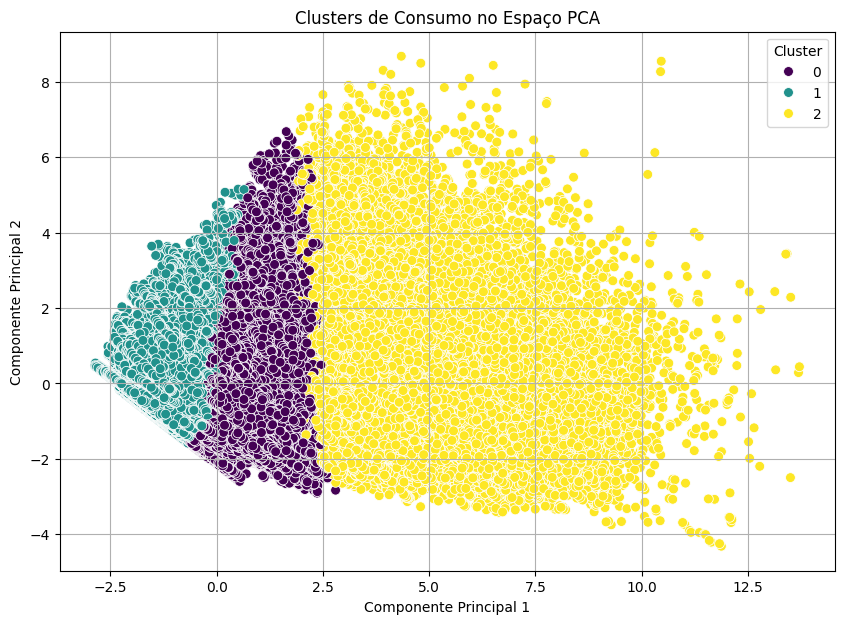


Não, os grupos não se separam de forma clara, indicando sobreposição considerável no espaço dos componentes principais.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_pca.fit_predict(dataset_pca_standardized)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Clusters de Consumo no Espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nNão, os grupos não se separam de forma clara, indicando sobreposição considerável no espaço dos componentes principais.")

## 25.

RMSE da Regressão Linear: 0.9691
RMSE da Regressão Polinomial (Grau 2): 0.9648


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


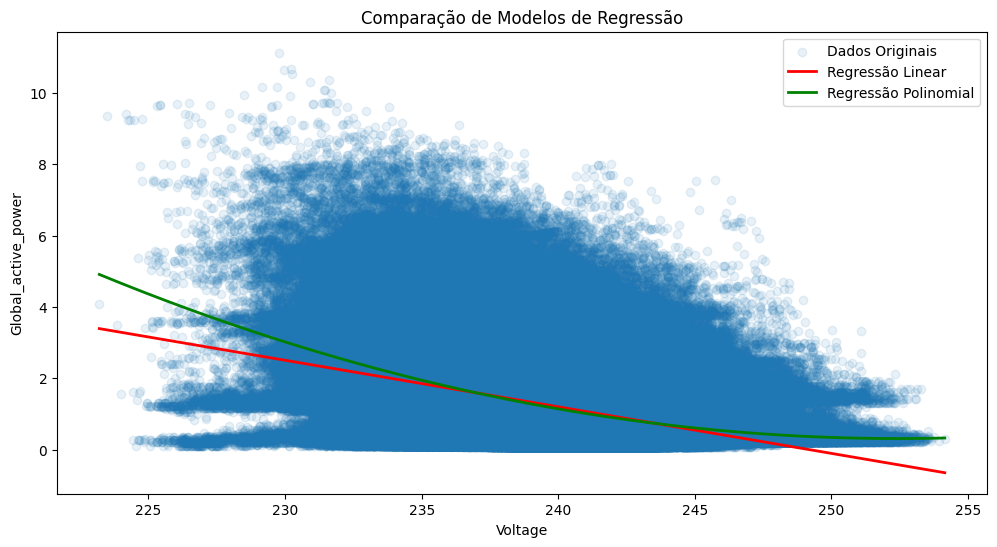

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


regression_data = dataset[['Voltage', 'Global_active_power']].dropna()
X_voltage = regression_data[['Voltage']]
y_power = regression_data['Global_active_power']

linear_model = LinearRegression()
linear_model.fit(X_voltage, y_power)
y_pred_linear = linear_model.predict(X_voltage)
rmse_linear = np.sqrt(mean_squared_error(y_power, y_pred_linear))

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_voltage)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_power)
y_pred_poly = poly_model.predict(X_poly)
rmse_poly = np.sqrt(mean_squared_error(y_power, y_pred_poly))

print(f"RMSE da Regressão Linear: {rmse_linear:.4f}")
print(f"RMSE da Regressão Polinomial (Grau 2): {rmse_poly:.4f}")

plt.figure(figsize=(12, 6))
plt.scatter(X_voltage, y_power, alpha=0.1, label='Dados Originais')
sort_axis = np.argsort(X_voltage.values.flatten())
plt.plot(X_voltage.values[sort_axis], y_pred_linear[sort_axis], color='red', linewidth=2, label='Regressão Linear')
plt.plot(X_voltage.values[sort_axis], y_pred_poly[sort_axis], color='green', linewidth=2, label='Regressão Polinomial')
plt.title('Comparação de Modelos de Regressão')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

## 26 - Novo dataset Appliances Energy Prediction

In [ ]:
energy_df = pd.read_csv('/content/energydata_complete.csv')
print("Informações do Dataset (Tipos de Dados):")
energy_df.info()
print("\nEstatísticas Descritivas:")
display(energy_df.describe())

Informações do Dataset (Tipos de Dados):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8 

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## 27.

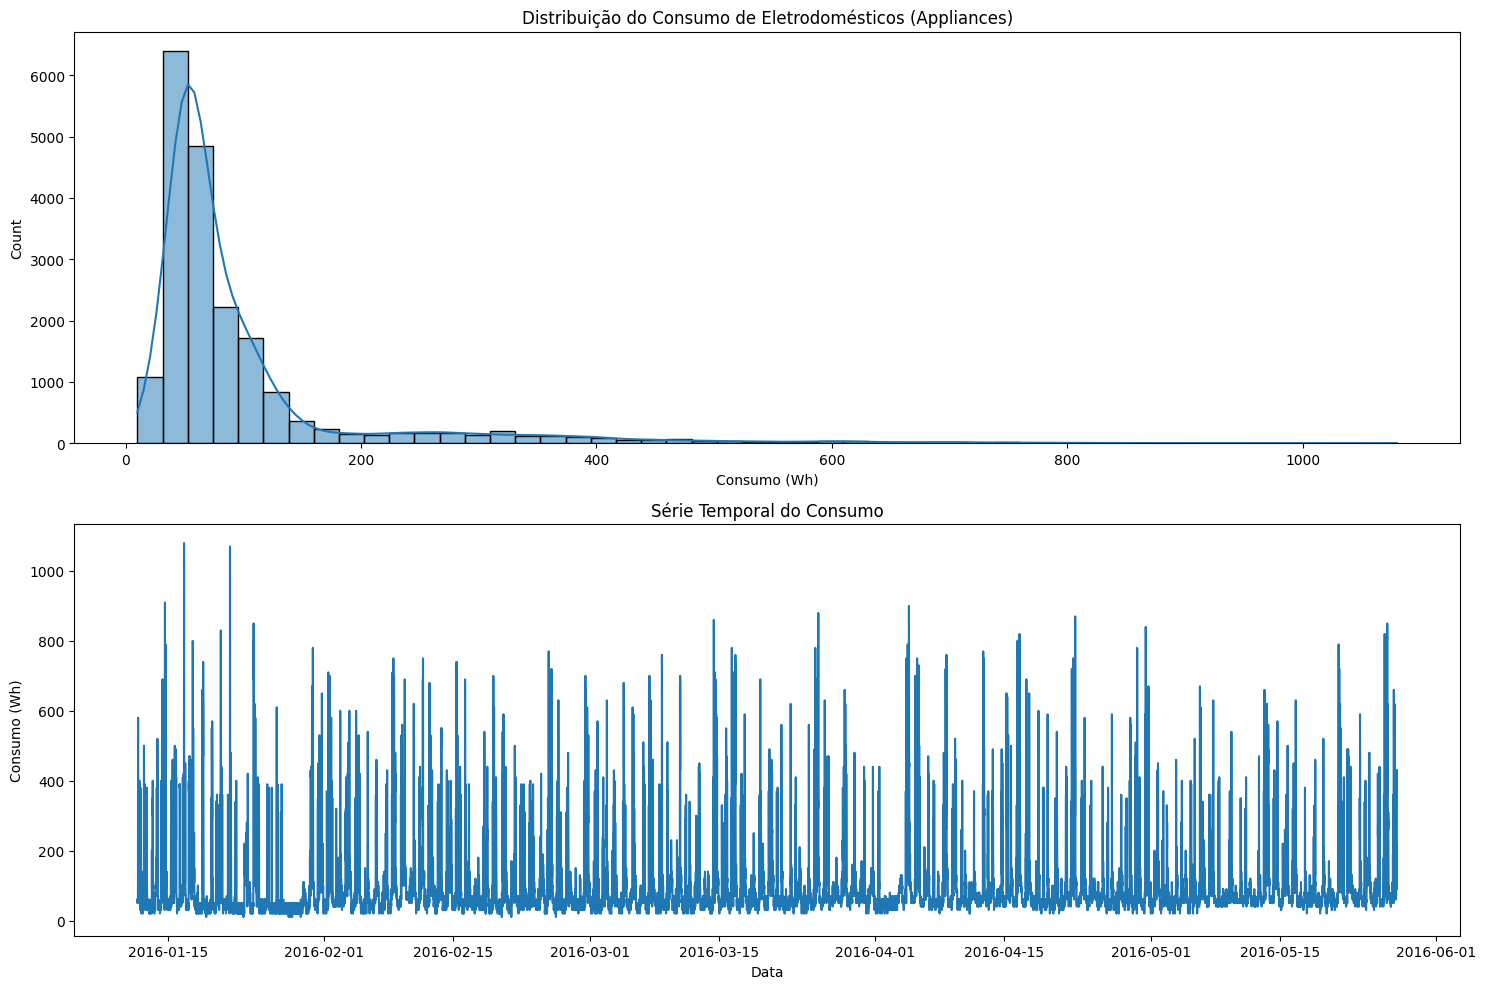


O consumo tende a se concentrar em valores baixos, com a maioria dos registros abaixo de 200 Wh.


In [ ]:
energy_df['date'] = pd.to_datetime(energy_df['date'])
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

sns.histplot(energy_df['Appliances'], bins=50, kde=True, ax=ax1)
ax1.set_title('Distribuição do Consumo de Eletrodomésticos (Appliances)')
ax1.set_xlabel('Consumo (Wh)')

ax2.plot(energy_df['date'], energy_df['Appliances'])
ax2.set_title('Série Temporal do Consumo')
ax2.set_xlabel('Data')
ax2.set_ylabel('Consumo (Wh)')

plt.tight_layout()
plt.show()
print("\nO consumo tende a se concentrar em valores baixos, com a maioria dos registros abaixo de 200 Wh.")

## 28.

In [ ]:
numerical_energy_df = energy_df.select_dtypes(include=np.number)
correlation_matrix_energy = numerical_energy_df.corr()
appliances_corr = correlation_matrix_energy['Appliances'].sort_values(ascending=False)
print("Correlação de 'Appliances' com outras variáveis:")
print(appliances_corr)
print("\n'lights' e as temperaturas internas ('T2', 'T6') têm a maior correlação com o consumo.")

Correlação de 'Appliances' com outras variáveis:
Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64

'lights' e as temperaturas internas ('T2', 'T6') têm a maior correlação com o consumo.


## 29.


In [ ]:
scaler = MinMaxScaler()
numerical_cols_to_scale = energy_df.select_dtypes(include=np.number).columns.drop(['rv1', 'rv2'], errors='ignore')
energy_df_scaled = energy_df.copy()
energy_df_scaled[numerical_cols_to_scale] = scaler.fit_transform(energy_df[numerical_cols_to_scale])
print("Dados após a normalização:")
display(energy_df_scaled.head())

Dados após a normalização:


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,13.275433,13.275433
1,2016-01-11 17:10:00,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,18.606195,18.606195
2,2016-01-11 17:20:00,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,28.642668,28.642668
3,2016-01-11 17:30:00,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,45.410389,45.410389
4,2016-01-11 17:40:00,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,10.084097,10.084097


## 30.


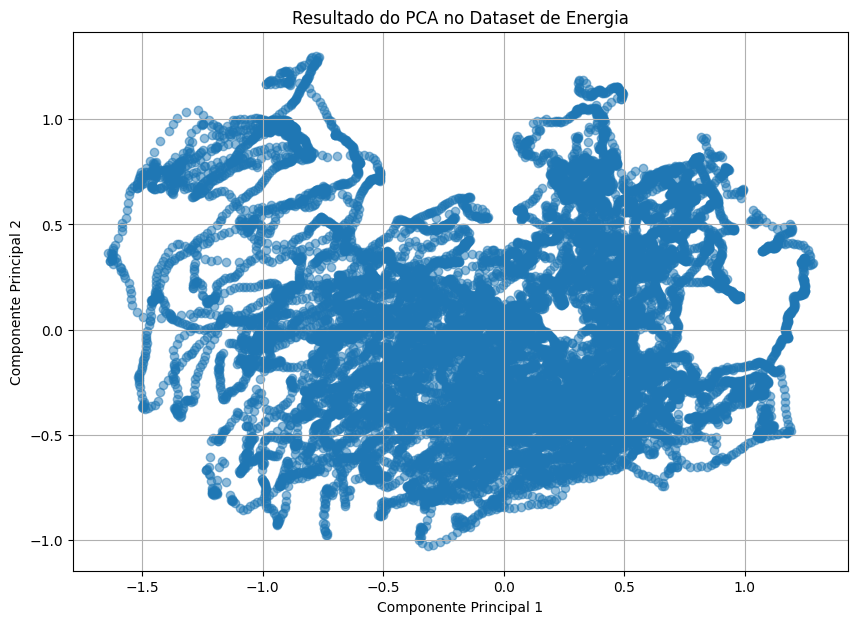


Não aparecem agrupamentos naturais claros; os dados formam uma nuvem densa.


In [ ]:
X_energy_scaled = energy_df_scaled[numerical_cols_to_scale]
pca_energy = PCA(n_components=2)
energy_pca_result = pca_energy.fit_transform(X_energy_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(energy_pca_result[:, 0], energy_pca_result[:, 1], alpha=0.5)
plt.title('Resultado do PCA no Dataset de Energia')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()
print("\nNão aparecem agrupamentos naturais claros; os dados formam uma nuvem densa.")

## 31. Regressão Linear Múltipla



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

features = energy_df_scaled.drop(columns=['date', 'Appliances', 'rv1', 'rv2'], errors='ignore')
target = energy_df_scaled['Appliances']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)
r2_multi = r2_score(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print(f"R² (Coeficiente de Determinação): {r2_multi:.4f}")
print(f"MAE (Erro Absoluto Médio): {mae_multi:.4f}")

R² (Coeficiente de Determinação): 0.1694
MAE (Erro Absoluto Médio): 0.0491


## 32.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_lr_multi = np.sqrt(mean_squared_error(y_test, y_pred_multi))

print(f"RMSE do Random Forest Regressor: {rmse_rf:.4f}")
print(f"RMSE da Regressão Linear Múltipla: {rmse_lr_multi:.4f}")

RMSE do Random Forest Regressor: 0.0634
RMSE da Regressão Linear Múltipla: 0.0852


## 33.

In [ ]:
kmeans_energy = KMeans(n_clusters=4, random_state=42, n_init=10)
X_energy_scaled['cluster'] = kmeans_energy.fit_predict(X_energy_scaled)
cluster_profiles = X_energy_scaled.groupby('cluster').mean()
print("Perfis de Consumo por Cluster (valores médios normalizados):")
display(cluster_profiles[['Appliances', 'lights', 'T2', 'T6', 'RH_1', 'RH_6']])

Perfis de Consumo por Cluster (valores médios normalizados):


/tmp/ipython-input-2142749790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_energy_scaled['cluster'] = kmeans_energy.fit_predict(X_energy_scaled)


,Appliances,lights,T2,T6,RH_1,RH_6
cluster,,,,,,
0,0.086533,0.030310,0.516984,0.637440,0.465963,0.265769
1,0.072426,0.055887,0.188250,0.260636,0.302584,0.675689
2,0.093153,0.042285,0.370069,0.498640,0.304173,0.216595
3,0.081007,0.081822,0.283275,0.373465,0.459219,0.890673


## 34.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mediana_consumo = energy_df['Appliances'].median()
energy_df_scaled['consumo_alto'] = (energy_df['Appliances'] > mediana_consumo).astype(int)

y_class = energy_df_scaled['consumo_alto']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, y_class, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_class, y_train_class)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_class, y_train_class)
print("Modelos de classificação treinados.")

Modelos de classificação treinados.


## 35.

--- Avaliação do Random Forest Classifier ---
               precision    recall  f1-score   support

Baixo Consumo       0.90      0.91      0.91      2127
 Alto Consumo       0.90      0.88      0.89      1820

     accuracy                           0.90      3947
    macro avg       0.90      0.90      0.90      3947
 weighted avg       0.90      0.90      0.90      3947



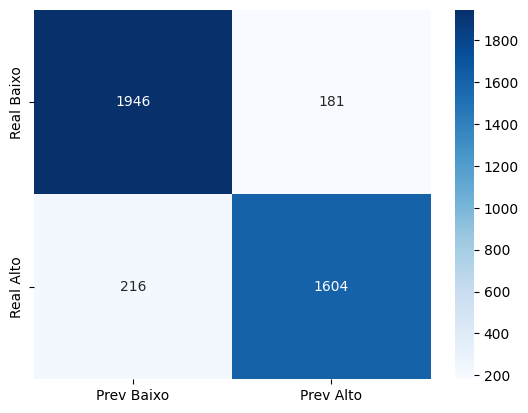


O modelo tende a errar um pouco mais ao classificar o consumo alto como baixo (Falsos Negativos).


In [ ]:
y_pred_rf_clf = rf_clf.predict(X_test_class)
print("--- Avaliação do Random Forest Classifier ---")
print(classification_report(y_test_class, y_pred_rf_clf, target_names=['Baixo Consumo', 'Alto Consumo']))
cm = confusion_matrix(y_test_class, y_pred_rf_clf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Prev Baixo', 'Prev Alto'], yticklabels=['Real Baixo', 'Real Alto'])
plt.show()
print("\nO modelo tende a errar um pouco mais ao classificar o consumo alto como baixo (Falsos Negativos).")

## 36 - Exercícios no Orange Data Mining

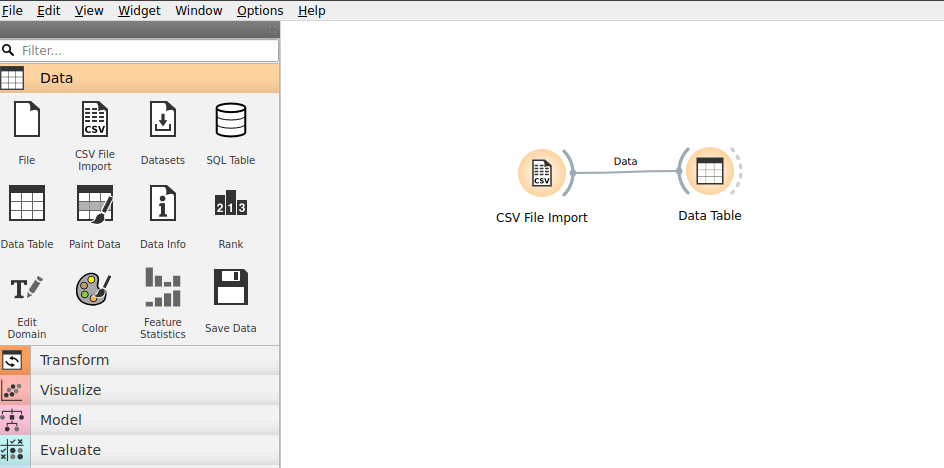

#### **Quantas variáveis e registros aparecem?**
- Variáveis: 2075259
- Registros: 9

## 37. Amostragem de dados (1%)

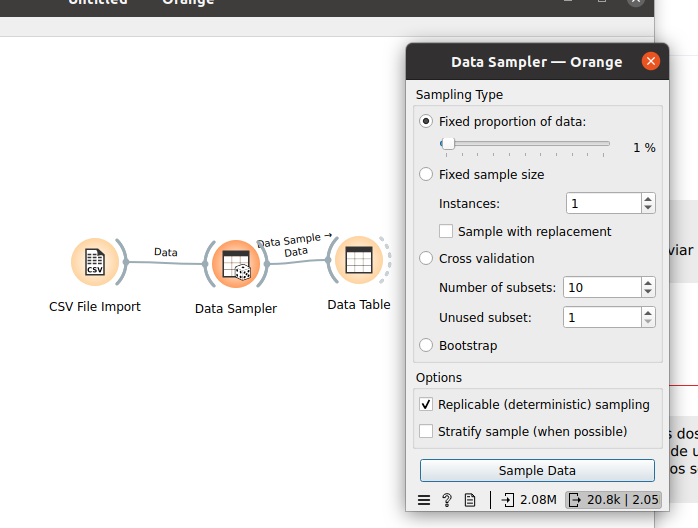

#### **A distribuição de Global_active_power na amostra é semelhante à base completa?**
  - Sim, como visto anteriormente, a distribuição na amostra é semelhante à da base completa.

## 38. Distribuição do consumo

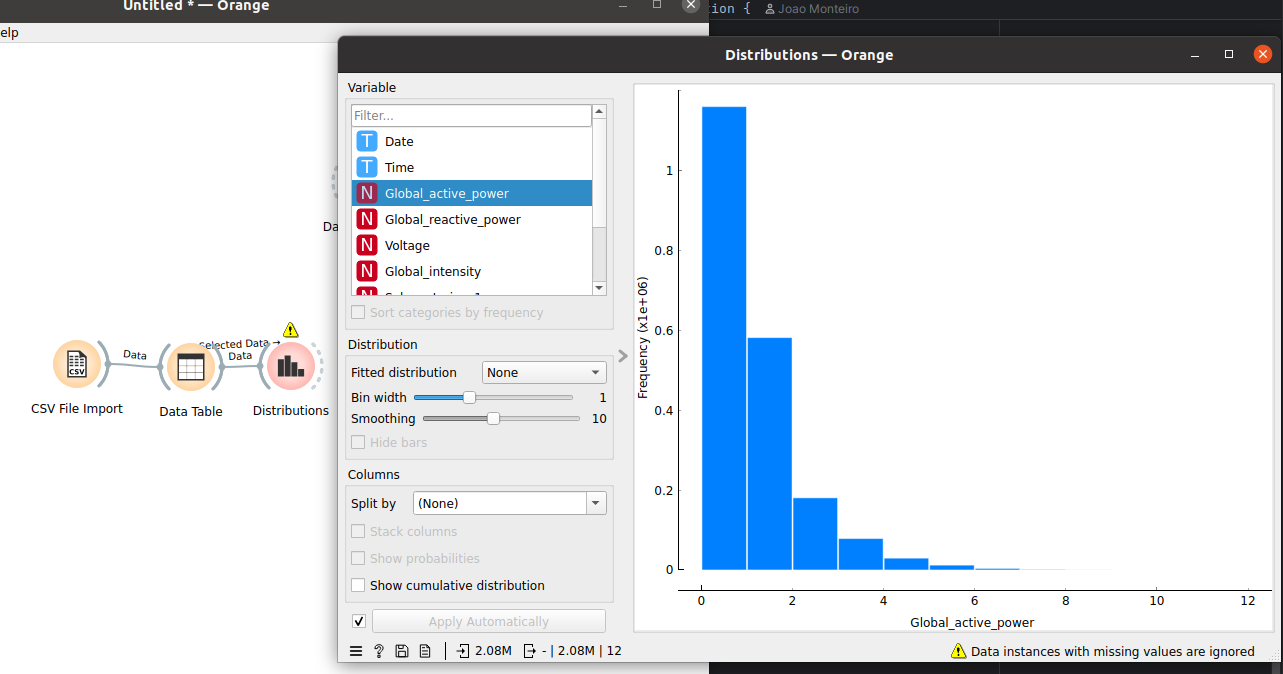

#### **O consumo é concentrado em valores baixos ou há muitos registros de alto consumo?**
  - O consumo é fortemente concentrado em valores baixos.

## 
39. Relação entre variáveis elétricas

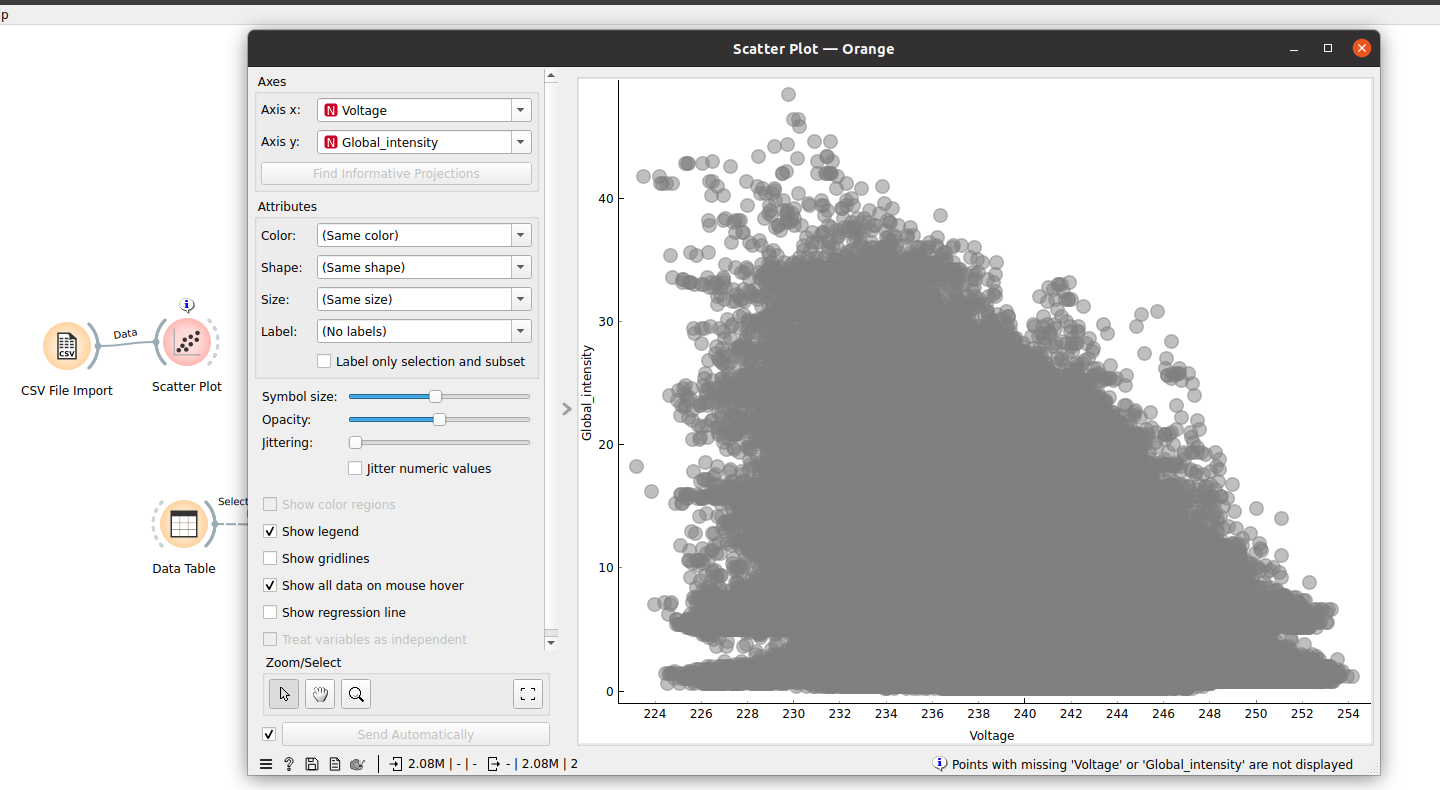

#### **Pergunta: existe correlação visível?**
- Sim, existe uma correlação negativa visível; com o aumento da tensão, a intensidade tende a diminuir.

## 40. Clustering com K-Means

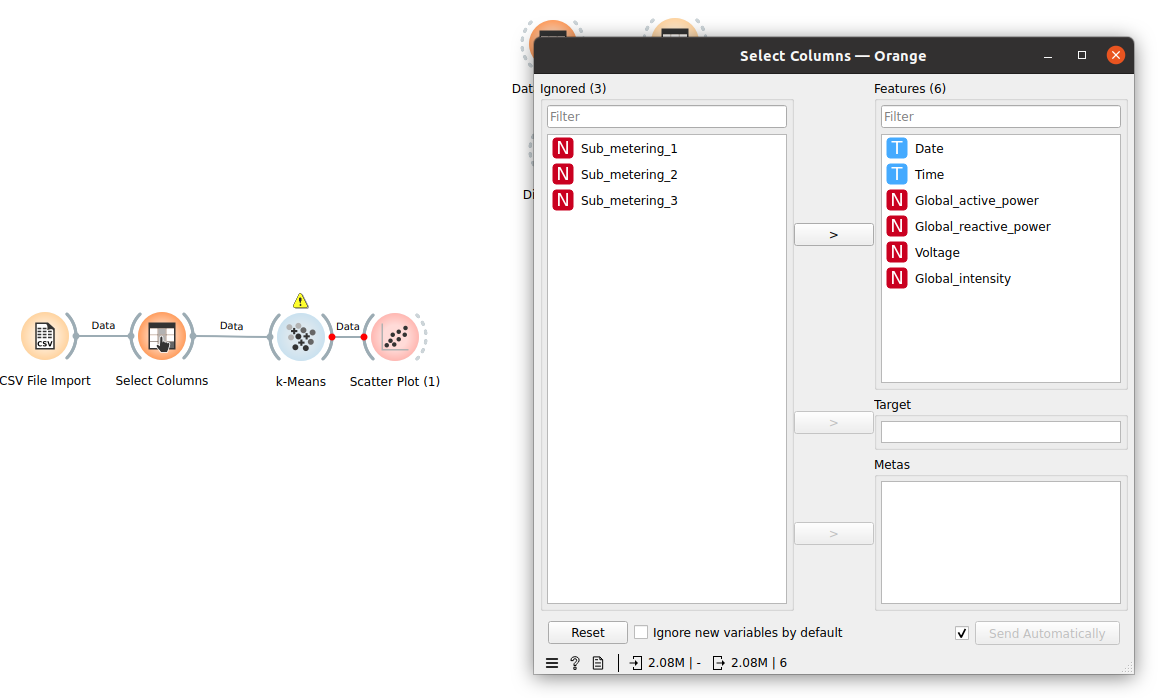

#### **Cada cluster representa um padrão distinto de consumo doméstico?**
  - Sim, cada cluster representa um padrão distinto, separando os dias com base em qual área da casa (cozinha, lavanderia, climatização) teve o maior consumo.